<a href="https://colab.research.google.com/github/MaliusMartin/Useful-Python-Scripts/blob/main/PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PID Control Theory
At the highest level, control systems work to decrease the difference between a variable's current state, known as the process variable, and a desired final state, known as the set point. This difference is known as the error signal. These systems are considered closed-loop systems because they continuously monitor the process variable, compare it to the set point, and adjust the control inputs based on the error signal to minimize this difference, thereby maintaining the desired system performance despite disturbances or changes in the environment.

For example, consider a heater that starts at 24C (i.e., process variable) but wants to reach 100C (i.e., set point). In this case, the original error signal is 76C. The control system will work to minimize this error signal by bringing the system’s actual temperature as close to 100C as possible.

operates on the principle of modulating an output control signal based on the error signal at present, as well as how the error signal is changing over time. More specifically, there are three components to a PID controller: a proportional (P) term, an integral (I) term, and a derivative (D) term, where the P term is a measure of the current error signal, the I term is the sum of the error signal over time, and the D term is the instantaneous rate of change of the error signal.


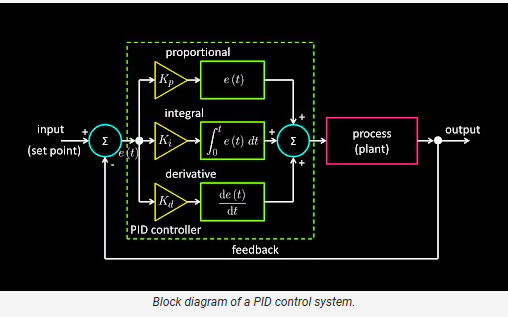


The standard mathematical form of a PID controller is given by the following equation

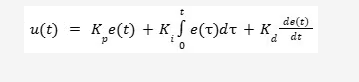

Where

u(t) is the control output.

Kp is the proportional gain.

Ki is the integral gain.

Kd is the derivative gain.

e(t) is the error signal, defined as the difference between the setpoint r(t) and the process variable y(t):
e(t) = r(t)- y(t)

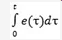

 is the integral of the error over time.

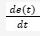

is the derivative of the error with respect to time.

#Implementing a PID Controller Algorithm in Python


Step 1: Importing Libraries

In this segment, we import the necessary libraries. The time library provides various time-related functions, which are used for introducing delays (time.sleep) in the simulation. The matplotlib.pyplot library is used for plotting graphs, allowing us to visualize the process variable (PV), setpoint, and control output over time.

In [1]:
import time
import matplotlib.pyplot as plt

Step 2: PID Controller Function

This function implements the core logic of the PID controller. It takes the setpoint, current process variable (PV), PID gains (kp, ki, kd), previous error, integral of the error, and the time step (dt) as inputs. It computes the current error as the difference between the setpoint and the PV. The integral term accumulates the error over time, while the derivative term estimates the rate of change of the error. The control output is calculated by combining these three terms, each scaled by their respective gains (kp, ki, kd). The function returns the control output, current error, and updated integral.

In [2]:
def pid_controller(setpoint, pv, kp, ki, kd, previous_error, integral, dt):
    error = setpoint - pv
    integral += error * dt
    derivative = (error - previous_error) / dt
    control = kp * error + ki * integral + kd * derivative
    return control, error, integral

Step 3: Main Simulation Function


The main function initializes the parameters required for the simulation. The setpoint is the desired value we want the PV to reach. The initial PV is set to 0. The PID gains (kp, ki, kd) are set to values that aim to stabilize the system. The previous_error and integral are initialized to 0. The dt parameter represents the time step for each iteration of the simulation.

Step 4: Data Storage Initialization

Here, we initialize lists to store data that will be used for plotting. time_steps will store the time points at each iteration, pv_values will store the PV at each time step, control_values will store the control output at each time step, and setpoint_values will store the setpoint value at each time step.


In [3]:
time_steps = []
pv_values = []
control_values = []
setpoint_values = []

Step 5: Simulation Loop

The loop runs for 100 iterations, simulating the control process over time. In each iteration, the pid_controller function is called to compute the control output, current error, and updated integral. The PV is then updated based on the control output (simplified by multiplying control by dt). The previous error is updated to the current error for the next iteration. The current time, PV, control output, and setpoint values are appended to their respective lists. The time.sleep(dt) function introduces a delay to simulate real-time behavior.

In [4]:
from IPython import get_ipython
from IPython.display import display
import time
import matplotlib.pyplot as plt
import numpy as np

# Define pid_controller function (assuming it's defined elsewhere)
# ... (Your pid_controller function definition here) ...

def main():
    setpoint = 100  # Desired setpoint
    pv = 0  # Initial process variable
    kp = 1.0  # Proportional gain
    ki = 0.1  # Integral gain
    kd = 0.05  # Derivative gain
    previous_error = 0
    integral = 0
    dt = 0.1  # Time step


    for i in range(100):  # Simulate for 100 time steps
        # Call pid_controller with all necessary arguments, including setpoint
        control, error, integral = pid_controller(setpoint, pv, kp, ki, kd, previous_error, integral, dt)
        pv += control * dt  # Update process variable based on control output (simplified)
        previous_error = error

        time_steps.append(i * dt)
        pv_values.append(pv)
        control_values.append(control)
        setpoint_values.append(setpoint)

        time.sleep(dt)
#Call the main function
main()

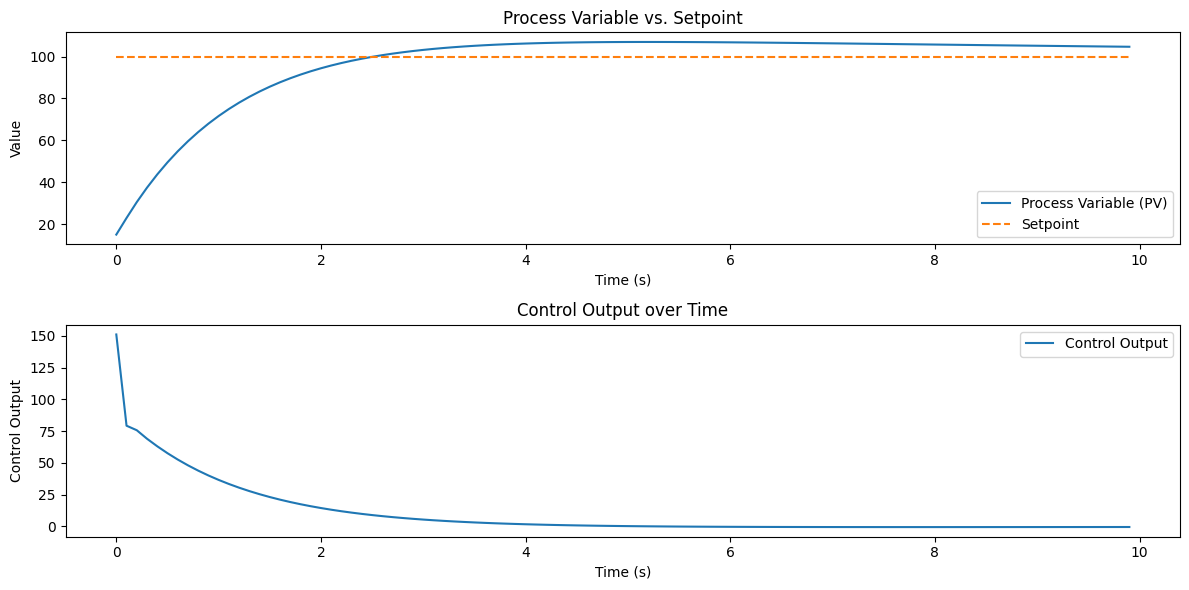

In [5]:

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_steps, pv_values, label='Process Variable (PV)')
plt.plot(time_steps, setpoint_values, label='Setpoint', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Process Variable vs. Setpoint')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_steps, control_values, label='Control Output')
plt.xlabel('Time (s)')
plt.ylabel('Control Output')
plt.title('Control Output over Time')
plt.legend()
plt.tight_layout()
plt.show()